In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


# Case Study

About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

What good looks like?

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
Give recommendations and action items to Walmart.
Evaluation Criteria

Defining Problem Statement and Analyzing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes ​
Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots
Missing Value & Outlier Detection (10 Points)
Business Insights based on Non- Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot
Answering questions (50 Points)
Are women spending more money per transaction than men? Why or Why not? (10 Points)
Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
Results when the same activity is performed for Married vs Unmarried (10 Points)
Results when the same activity is performed for Age (10 Points)
Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Comments on different variables when generalizing it for Population
Recommendations (10 Points)
Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
Submission Process:

Type your insights and recommendations in the text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.




# Defining Problem Statement and Analyzing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes ​
Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots

In [2]:
df_wal=pd.read_csv("walmart_data.csv")

In [3]:
df_wal.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df_wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


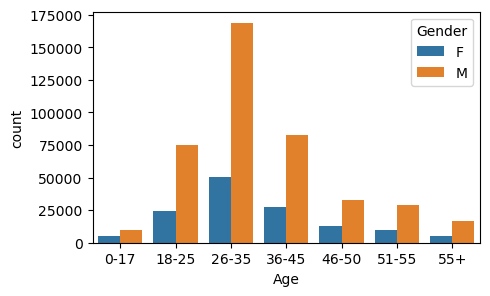

In [278]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_wal,x=df_wal["Age"],hue="Gender",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
plt.show()

# insights
   Purchases are more from the Customers in 26-35 age group
   Male customers are seems to be more in all age group
   

In [232]:
def plot_n(df,column):
    grouped_df=df.groupby([column]).agg({"Purchase":"sum"}).reset_index()
    sns.barplot( grouped_df,x=column,y="Purchase")
    a=len(str(np.round(max(grouped_df["Purchase"]),0)))
    if(a>8):
        c="Billions"
    elif(8>a>6):
        c="Millions"
    plt.title(f"Purchase in {c} based on different {column} group")
    plt.show()

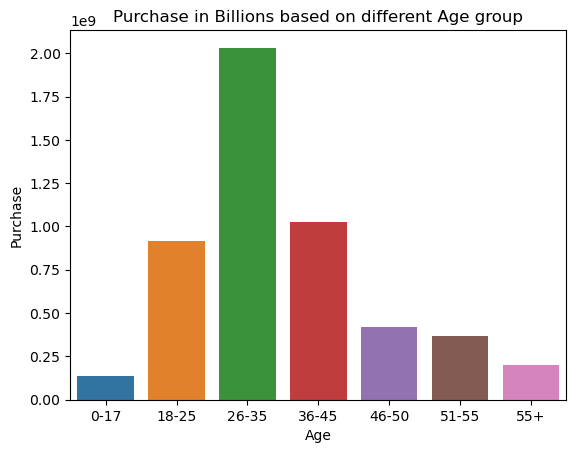

In [235]:
plot_n(df_wal,"Age")

# Insights
   Sale from the age group of 26-25 are more than 2 billion

In [267]:
def plot_b(df,column,hue):
    plt.figure(figsize=(5,3))
    sns.barplot(df,x=column,y="Purchase",estimator='sum',order=df[column].unique(),hue=hue)
    plt.title(f"Purchase based on different {column} group")
    a=len(str(np.round(max(grouped_df["Purchase"]),0)))
    if(a>8):
        c="Billions"
    elif(8>a>6):
        c="Millions"
    plt.title(f"Purchase in {c} based on different {column} group")
    plt.show()

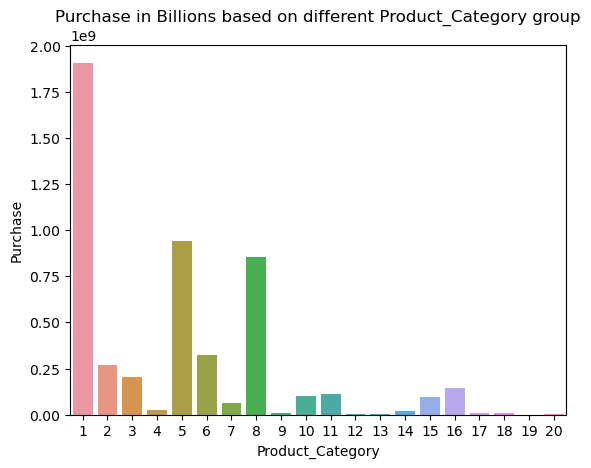

In [236]:
plot_n(df_wal,"Product_Category")

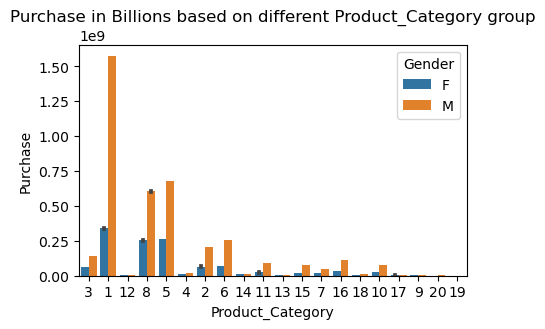

In [268]:
plot_b(df_wal,"Product_Category","Gender")

# Insights
   Products 1,5,8 are the top selling products in the respective order
   In all product category the Males are leaidng the sale
 

In [247]:
def box_plot_n(df,column1,column2,hue):
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df,x=column1,y=column2,hue=hue,showmeans=True)
    plt.title(f"Boxplot between {column1} and {column2}")
    plt.show()

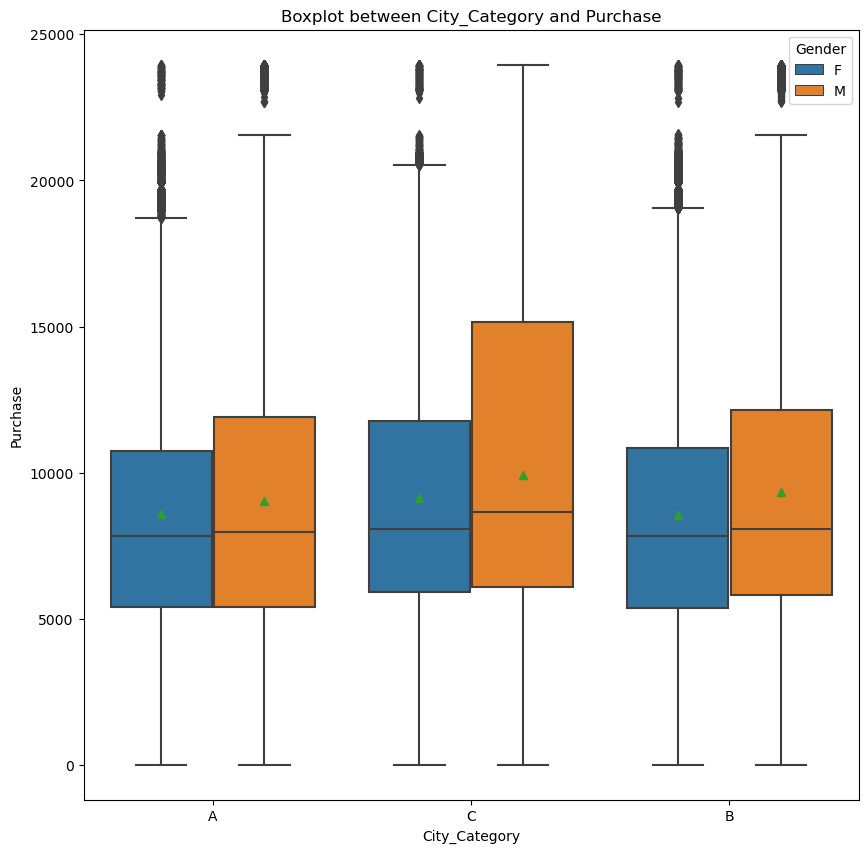

In [248]:
box_plot_n(df_wal,"City_Category","Purchase","Gender")

# insight
Males in City category C is having highest median purchase value

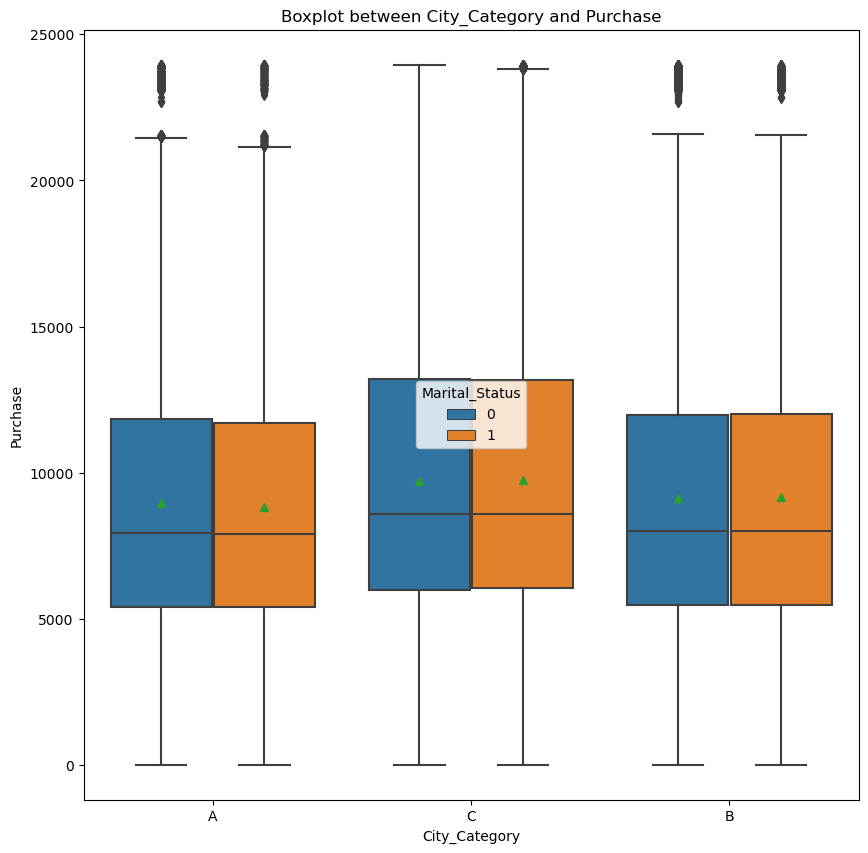

In [395]:
box_plot_n(df_wal,"City_Category","Purchase","Marital_Status")

# insight
   Males in City category C is having highest median purchase value

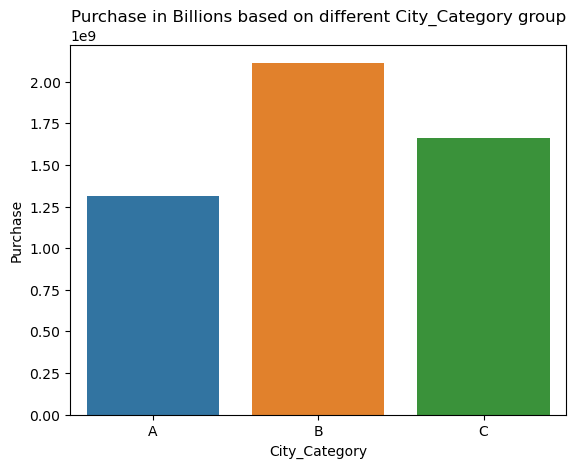

In [249]:
plot_n(df_wal,"City_Category")

# insights
   
   Customers from City category B is having highest purchases
   

In [273]:
def histplot_n(df,column,bins):
    grouped_df=df.groupby([column]).agg({"Purchase":"sum"}).reset_index()
    sns.histplot( data=grouped_df,x="Purchase",bins=10,kde=True,color='orange', edgecolor='red')
    plt.title(f"Number of {column} in each Purchase group")
    a=len(str(np.round(max(grouped_df["Purchase"]),0)))
    if(a>8):
        c="Billions"
    elif(8>a>6):
        c="Millions"
    else:
        c="lakhs"
    plt.title(f"Number of {column} in each Purchase group with bins in {c}")
    plt.show()

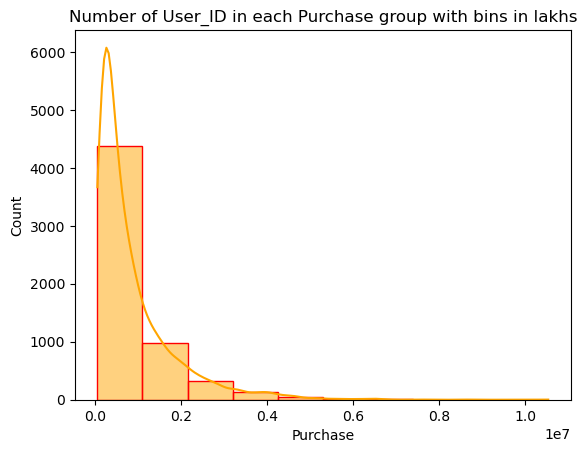

In [274]:
histplot_n(df_wal,"User_ID",20)

# Insights
   Most of the customers are falling in the category of 0.0 to 0.2 lakhs

<Axes: >

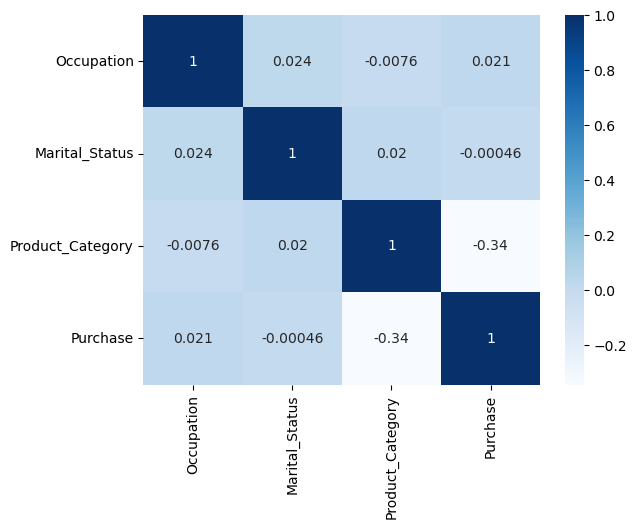

In [296]:
sns.heatmap(df_wal[["Occupation","Marital_Status","Product_Category","Purchase"]].corr(),cmap="Blues",annot=True)   

# Insights
   Marital status and purchase are negativeley related
   


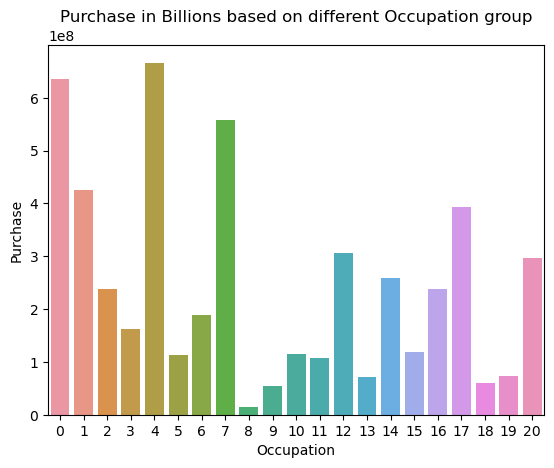

In [300]:
plot_n(df_wal,"Occupation")

# insights
   Purchase are lower while comparing married to unmarried customers
   Customers with occupation 4,0,7 are spending more money
   There are no major difference in Median purchase value of customers of different marital status

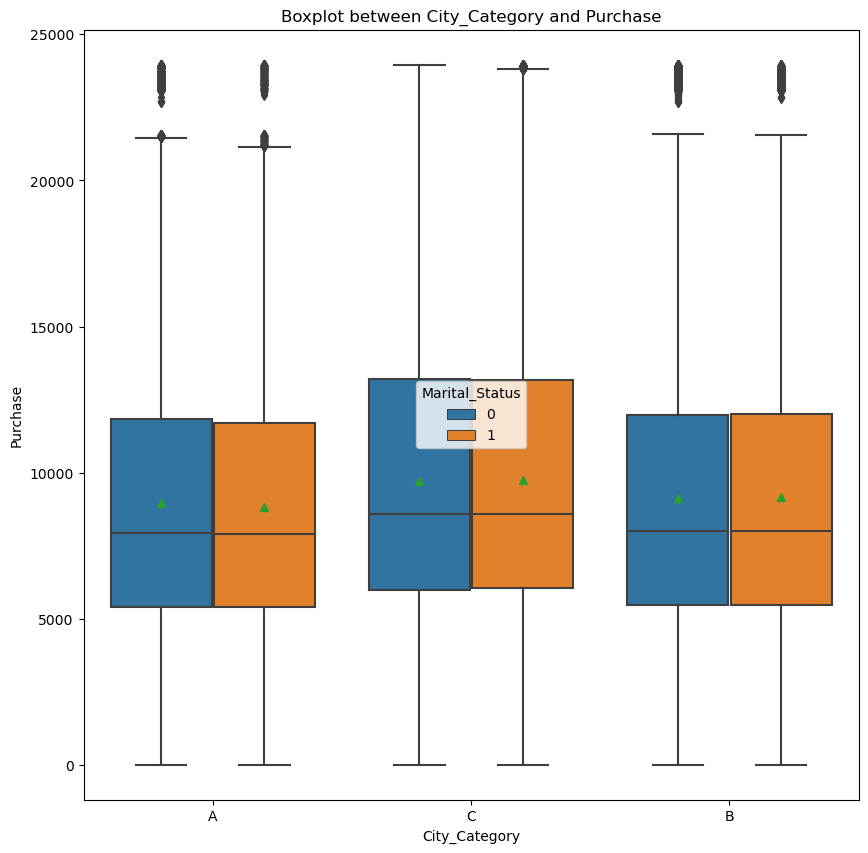

In [301]:
box_plot_n(df_wal,"City_Category","Purchase","Marital_Status")

# insights
   There are no major difference in Median purchase value of customers of different marital status

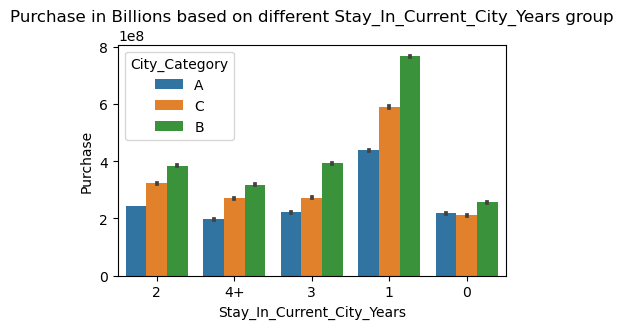

In [397]:
plot_b(df_wal,"Stay_In_Current_City_Years","City_Category")

# Insights
   Customers staying in a city for 1 years are spending more compared to others, might be adding the household required for longer stay in the city
   

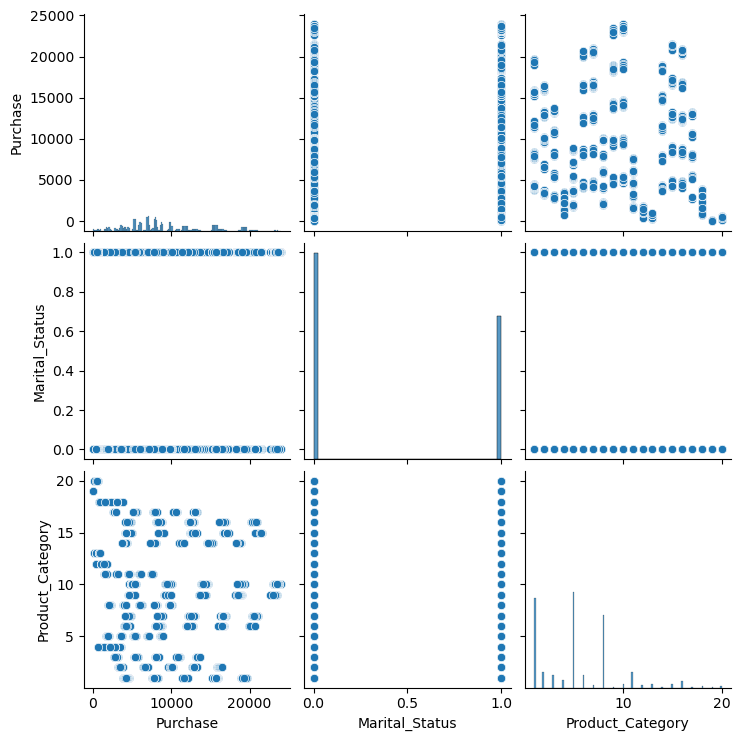

In [401]:
sns.pairplot(df_wal[["Purchase","Marital_Status","Product_Category"]])

# insights
   We are not able to establish a co relation using the pairplot

# Missing Value & Outlier Detection (10 Points)

In [5]:
df_wal.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df_wal.shape

(550068, 10)

In [12]:
col_wal=df_wal.columns

In [13]:
col_wal

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [26]:
def unique_val(col_wal):
    for i in col_wal:
        print(f"unique_nos of {i} is {df_wal[i].nunique()}")
        

In [27]:
unique_val(col_wal)

unique_nos of User_ID is 5891
unique_nos of Product_ID is 3631
unique_nos of Gender is 2
unique_nos of Age is 7
unique_nos of Occupation is 21
unique_nos of City_Category is 3
unique_nos of Stay_In_Current_City_Years is 5
unique_nos of Marital_Status is 2
unique_nos of Product_Category is 20
unique_nos of Purchase is 18105


In [5]:
df_wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# Using the normal distribution , we are trying to find out the population mean confidence interval with different confidence level

In [149]:
def nor_con_int(df,con):
    grouped_df=df.groupby(["User_ID"]).agg({"Purchase":"sum"}).reset_index()
    grouped_mean=np.round(np.mean(grouped_df["Purchase"]),2)
    grouped_std=np.round(np.std(grouped_df["Purchase"]),2)
    group_count=grouped_df["Purchase"].count()
    low_limit=np.round(grouped_mean+(norm.ppf((100-con)/200)*(grouped_std/np.sqrt(group_count))),2)
    up_limit=np.round(grouped_mean+(norm.ppf((con/100)+((100-con)/200))*(grouped_std/np.sqrt(group_count))),2)
    print(f"Population mean lies between {low_limit} and {up_limit} with {con}% confidence")
    

# Using bootstrapping,we are trying to find out the population mean confidence interval with different confidence level

In [103]:
def boot_strap_int(df,con,sample_size,trial):
    grouped_df=df.groupby(["User_ID"]).agg({"Purchase":"sum"}).reset_index()
    sample_size_mean=[np.mean(np.random.choice(grouped_df["Purchase"],sample_size)) for i in range(trial)]
    low_limit=np.round(np.percentile(sample_size_mean,(100-con)/2),2)
    up_limit=np.round(np.percentile(sample_size_mean,con+(100-con)/2),2)
    print(f"Population mean lies between {low_limit} and {up_limit} with {con}% confidence") 

In [4]:
cus_men=df_wal[df_wal["Gender"]=="M"]
cus_wom=df_wal[df_wal["Gender"]=="F"]

Answering questions (50 Points)
Are women spending more money per transaction than men? Why or Why not? (10 Points)
Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
Results when the same activity is performed for Married vs Unmarried (10 Points)
Results when the same activity is performed for Age (10 Points)

# population mean of men's spending using normal distribution method

In [304]:
nor_con_int(cus_men,95) # with 95% confidence

Population mean lies between 895621.9 and 955066.9 with 95% confidence


In [305]:
nor_con_int(cus_men,99) # with 99% confidence

Population mean lies between 886282.41 and 964406.39 with 99% confidence


In [306]:
nor_con_int(cus_men,90) # with 90% confidence

Population mean lies between 900400.49 and 950288.31 with 90% confidence


# population mean of men's spending using bootstrap method

In [307]:
boot_strap_int(cus_men,con=95,sample_size=1000,trial=5000) #with 95% confidence

Population mean lies between 863610.72 and 984879.83 with 95% confidence


In [308]:
boot_strap_int(cus_men,con=99,sample_size=1000,trial=5000) #with 99% confidence

Population mean lies between 847802.07 and 1005839.28 with 99% confidence


In [310]:
boot_strap_int(cus_men,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 875133.34 and 977920.08 with 90% confidence


# population mean of women's spending using normal distribution method

In [311]:
nor_con_int(cus_wom,95) # with 95% confidence

Population mean lies between 673267.12 and 750781.66 with 95% confidence


In [312]:
nor_con_int(cus_wom,99) # with 99% confidence

Population mean lies between 661088.7 and 762960.08 with 99% confidence


In [314]:
nor_con_int(cus_wom,90) # with 90% confidence

Population mean lies between 679498.26 and 744550.52 with 90% confidence


# population mean of women's spending using bootstrap method

In [315]:
boot_strap_int(cus_wom,con=95,sample_size=1000,trial=5000) #with 95% confidence

Population mean lies between 665290.04 and 764168.97 with 95% confidence


In [316]:
boot_strap_int(cus_wom,con=99,sample_size=1000,trial=5000) #with 95% confidence

Population mean lies between 650263.84 and 781156.86 with 99% confidence


In [317]:
boot_strap_int(cus_wom,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 671368.32 and 754861.51 with 90% confidence


# insigts
   population mean of men's spending is more compared to the women's spending at all confidence level
   

# Are women spending more money per transaction than men? Why or Why not? (10 Points)

In [344]:
Men_purchase_per_products=cus_men["Purchase"].sum()/cus_men["Product_ID"].nunique()

In [343]:
Women_purchase_per_products=cus_wom["Purchase"].sum()/cus_wom["Product_ID"].nunique()

In [345]:
Men_purchase_per_product_category=cus_men["Purchase"].sum()/cus_men["Product_Category"].nunique()

In [347]:
Women_purchase_per_product_category=cus_wom["Purchase"].sum()/cus_wom["Product_Category"].nunique()

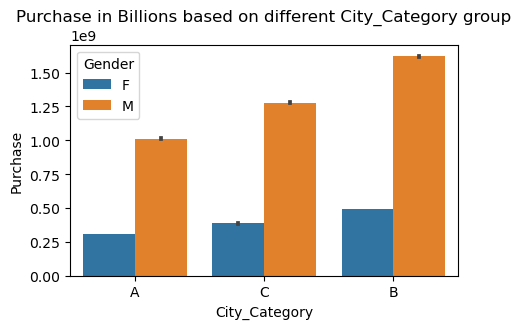

In [342]:
plot_b(df_wal,"City_Category",'Gender')

# insight
   Customers from City category B dominates the purchase

In [348]:
df_wal["Gender"].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [351]:
cus_men["Product_ID"].nunique()

3588

In [352]:
cus_wom["Product_ID"].nunique()

3367

In [353]:
cus_men["Product_Category"].nunique()

20

In [354]:
cus_wom["Product_Category"].nunique()

20

In [350]:
print(f"Men_purchase_per_products is {Men_purchase_per_products}")
print(f"Women_purchase_per_products is {Women_purchase_per_products}") 
print(f"Men_purchase_per_product_category is {Men_purchase_per_product_category}")
print(f"Women_purchase_per_product_category is {Women_purchase_per_product_category}")


Men_purchase_per_products is 1089626.5607580824
Women_purchase_per_products is 352311.44698544696
Men_purchase_per_product_category is 195479005.0
Women_purchase_per_product_category is 59311632.1


# insights
   In the data , men occupies 75% of the position , which is triple represenation of women in the data
   City category B is the higest contributing city category in terms of purchase and the womens representation is lesser in that    city category
   Men brought 3538 products of the total 3631 products IDs but the women brought only 3367
# Recommendation
   As per the analysis men are spending more and have more represenation in the customer domain. So need to staock more products    of the men.
   Need to increase the selling of all product Ids to women also if the same is relevant to them. 

In [357]:
df_wal.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [368]:
age_17=df_wal[df_wal["Age"]=="0-17"]
age_55_p=df_wal[df_wal["Age"]=="55+"]
age_35=df_wal[df_wal["Age"]=="26-35"]
age_50=df_wal[df_wal["Age"]=="46-50"]
age_55=df_wal[df_wal["Age"]=="51-55"]
age_45=df_wal[df_wal["Age"]=="36-45"]
age_25=df_wal[df_wal["Age"]=="18-25"]

# population mean of spending of diffrent age groups using normal distribution method

# Age group 0-17

In [363]:
nor_con_int(age_17,95) # with 95% confidence
nor_con_int(age_17,99) # with 99% confidence
nor_con_int(age_17,90) # with 90% confidence

Population mean lies between 527873.55 and 709862.07 with 95% confidence
Population mean lies between 499281.09 and 738454.53 with 99% confidence
Population mean lies between 542503.02 and 695232.6 with 90% confidence


# Age group 18-25

In [364]:
nor_con_int(age_25,95) # with 95% confidence
nor_con_int(age_25,99) # with 99% confidence
nor_con_int(age_25,90) # with 90% confidence

Population mean lies between 801658.66 and 908067.58 with 95% confidence
Population mean lies between 784940.6 and 924785.64 with 99% confidence
Population mean lies between 810212.53 and 899513.71 with 90% confidence


# Age group 26-35

In [365]:
nor_con_int(age_35,95) # with 95% confidence
nor_con_int(age_35,99) # with 99% confidence
nor_con_int(age_35,90) # with 90% confidence

Population mean lies between 945046.12 and 1034272.52 with 95% confidence
Population mean lies between 931027.63 and 1048291.01 with 99% confidence
Population mean lies between 952218.74 and 1027099.9 with 90% confidence


# Age group 36-45

In [366]:
nor_con_int(age_45,95) # with 95% confidence
nor_con_int(age_45,99) # with 99% confidence
nor_con_int(age_45,90) # with 90% confidence

Population mean lies between 823372.97 and 935958.45 with 95% confidence
Population mean lies between 805684.51 and 953646.91 with 99% confidence
Population mean lies between 832423.35 and 926908.07 with 90% confidence


# Age group 46-50

In [369]:
nor_con_int(age_50,95) # with 95% confidence
nor_con_int(age_50,99) # with 99% confidence
nor_con_int(age_50,90) # with 90% confidence

Population mean lies between 713581.55 and 871516.01 with 95% confidence
Population mean lies between 688768.24 and 896329.32 with 99% confidence
Population mean lies between 726277.39 and 858820.17 with 90% confidence


# Age group 51-55

In [370]:
nor_con_int(age_55,95) # with 95% confidence
nor_con_int(age_55,99) # with 99% confidence
nor_con_int(age_55,90) # with 90% confidence

Population mean lies between 692467.37 and 833934.47 with 95% confidence
Population mean lies between 670241.27 and 856160.57 with 99% confidence
Population mean lies between 703839.45 and 822562.39 with 90% confidence


# Age group 55+

In [371]:
nor_con_int(age_55_p,95) # with 95% confidence
nor_con_int(age_55_p,99) # with 99% confidence
nor_con_int(age_55_p,90) # with 90% confidence

Population mean lies between 477033.8 and 602360.68 with 95% confidence
Population mean lies between 457343.52 and 622050.96 with 99% confidence
Population mean lies between 487108.43 and 592286.05 with 90% confidence


# population mean of spending of diffrent age groups using bootstrapping method

# Age group 0-17

In [372]:
boot_strap_int(age_17,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_17,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_17,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 578088.1 and 661165.41 with 95% confidence
Population mean lies between 564116.26 and 675934.56 with 99% confidence
Population mean lies between 583838.08 and 655182.92 with 90% confidence


# Age group 18-25

In [373]:
boot_strap_int(age_25,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_25,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_25,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 801637.92 and 910487.12 with 95% confidence
Population mean lies between 782190.59 and 928798.8 with 99% confidence
Population mean lies between 808357.57 and 899529.99 with 90% confidence


# Age group 26-35

In [374]:
boot_strap_int(age_35,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_35,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_35,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 927468.81 and 1055304.52 with 95% confidence
Population mean lies between 910889.25 and 1074929.09 with 99% confidence
Population mean lies between 936706.58 and 1043856.38 with 90% confidence


# Age group 36-45

In [375]:
boot_strap_int(age_45,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_45,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_45,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 820699.02 and 941684.67 with 95% confidence
Population mean lies between 803579.55 and 965813.49 with 99% confidence
Population mean lies between 831726.62 and 931446.01 with 90% confidence


# Age group 46-50

In [376]:
boot_strap_int(age_50,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_50,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_50,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 736577.2 and 852395.84 with 95% confidence
Population mean lies between 718885.83 and 871776.05 with 99% confidence
Population mean lies between 745989.78 and 840586.43 with 90% confidence


# Age group 50-55

In [377]:
boot_strap_int(age_55,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_55,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_55,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 714252.92 and 812554.69 with 95% confidence
Population mean lies between 699418.23 and 832725.89 with 99% confidence
Population mean lies between 723183.71 and 804734.63 with 90% confidence


# Age group 55 plus

In [378]:
boot_strap_int(age_55_p,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(age_55_p,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(age_55_p,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 502414.47 and 578467.39 with 95% confidence
Population mean lies between 493938.92 and 593067.38 with 99% confidence
Population mean lies between 508936.51 and 572306.88 with 90% confidence


In [380]:
df_wal["Age"].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

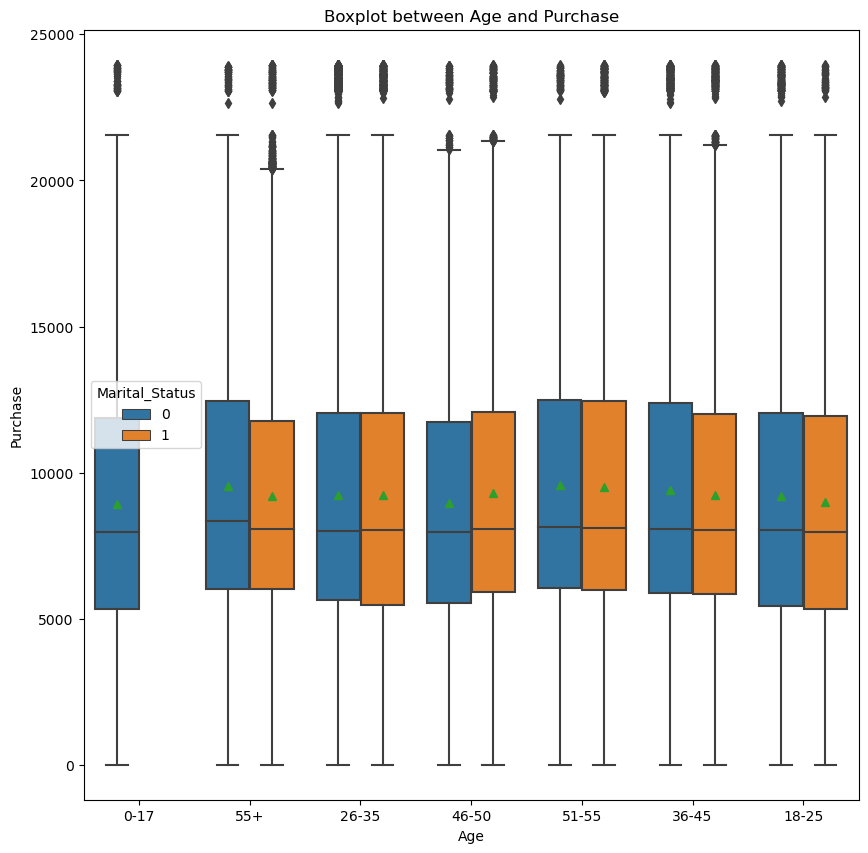

In [382]:
box_plot_n(df_wal,"Age","Purchase","Marital_Status")

Mode of the purchase value are alomost equal in all age category
Mode of purchase of married in the age group of 55+ is lesser but in the age group 26-25 and 46-50 the mode of marrried customers are more 

# insights
   Mean spending of age group  26-35 are more compared to all other categories followed by 36-45
   Oerlapping of confident intervals are there between almost all age groups
# Recommendation
   Need to increase the customer represenation in all age categoires except 26-35
   Need to ensure the customers are loyal to Walmart in all age groups

In [383]:
df_wal.Marital_Status.unique()

array([0, 1], dtype=int64)

In [385]:
un_mar=df_wal[df_wal["Marital_Status"]==0]
mar=df_wal[df_wal["Marital_Status"]==1]

# population mean of spending of diffrent age groups using normal distribution method

# Unmarried customers

In [388]:
nor_con_int(un_mar,95) # with 95% confidence
nor_con_int(un_mar,99) # with 99% confidence
nor_con_int(un_mar,90) # with 90% confidence

Population mean lies between 848746.42 and 912405.14 with 95% confidence
Population mean lies between 838744.92 and 922406.64 with 99% confidence
Population mean lies between 853863.74 and 907287.82 with 90% confidence


# Married customers

In [389]:
nor_con_int(mar,95) # with 95% confidence
nor_con_int(mar,99) # with 99% confidence
nor_con_int(mar,90) # with 90% confidence

Population mean lies between 806676.96 and 880376.64 with 95% confidence
Population mean lies between 795097.9 and 891955.7 with 99% confidence
Population mean lies between 812601.44 and 874452.16 with 90% confidence


# population mean of spending of diffrent age groups using bootstarpping method

# Unmarried customers

In [390]:
boot_strap_int(un_mar,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(un_mar,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(un_mar,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 823490.58 and 940836.71 with 95% confidence
Population mean lies between 807405.24 and 956640.22 with 99% confidence
Population mean lies between 831658.86 and 930366.52 with 90% confidence


# Married customers

In [391]:
boot_strap_int(mar,con=95,sample_size=1000,trial=5000) #with 95% confidence
boot_strap_int(mar,con=99,sample_size=1000,trial=5000) #with 99% confidence
boot_strap_int(mar,con=90,sample_size=1000,trial=5000) #with 90% confidence

Population mean lies between 786431.4 and 902569.72 with 95% confidence
Population mean lies between 770967.47 and 923105.21 with 99% confidence
Population mean lies between 795592.14 and 892198.48 with 90% confidence


In [392]:
df_wal["Marital_Status"].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

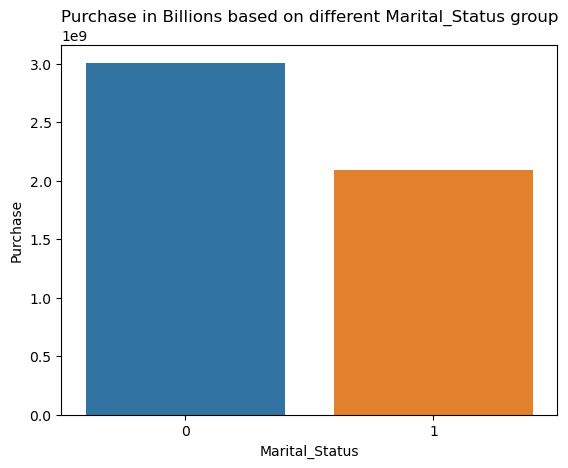

In [394]:
plot_n(df_wal,"Marital_Status")

# insights
   The mean of purchase value of unmarried customers are more than married
   

# Recommendation_overall
   Majority customers are male, need to increase the sales from the female customers so that overall sale can be increased
   As per the analysis men are spending more and have more represenation in the customer domain. So need to staock more products required by men
   Products 1,5,8 are the top selling products in the respective order, so need to watch on the stocks of these products
   Need to increase the selling of all product Ids to women also if the same is relevant to them.
   Most of the customers are falling in the category of 0.0 to 0.2 lakhs, so need to work on providing more products in lower price range
   Sale form the city B category is more, so need to open more stores in B type cities
   Customers staying in a city for 1 year are spending more, so give offers for this targetted category to increase the sale
   Customers with occupation 4,0,7 are spending more money, so give offers for this targetted category to increase the sale
   Need to ensure the customers are loyal to Walmart in all age groups, need to give more tuchpoints for the customers after the age of 35 to sustain the loyalty
   Unmarried customers are dominating the purchase, so need to offer more discount to keep them loyal on the future also
   
   

Submitted by Marshal Harsh Mathew

In [6]:
def boot_strap_samples(df,sample_size,trial):
    grouped_df=df.groupby(["User_ID"]).agg({"Purchase":"sum"}).reset_index()
    sample_size_mean=[np.mean(np.random.choice(grouped_df["Purchase"],sample_size)) for i in range(trial)]
    return(sample_size_mean)

<Axes: ylabel='Count'>

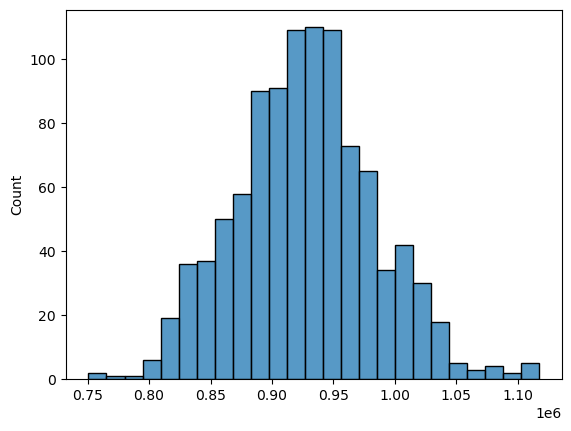

In [10]:
sns.histplot(data=boot_strap_samples(cus_men,300,1000))

<Axes: ylabel='Count'>

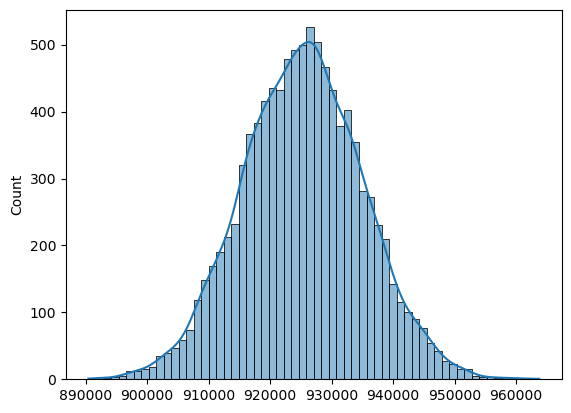

In [15]:
sns.histplot(data=boot_strap_samples(cus_men,10000,10000),kde=True)

In [16]:
data_samp_m=boot_strap_samples(cus_men,10000,10000)
data_samp_w=boot_strap_samples(cus_wom,10000,10000)

In [21]:
low_limit_m=np.round(np.percentile(data_samp_m,2.5),2)
up_limit_m=np.round(np.percentile(data_samp_m,97.5),2)

In [19]:
low_limit_w=np.round(np.percentile(data_samp_w,2.5),2)
up_limit_w=np.round(np.percentile(data_samp_w,97.5),2)

In [22]:
low_limit_m,up_limit_m

(906416.2, 944980.37)

In [23]:
low_limit_w,up_limit_w

(696573.65, 727840.94)